In [1]:
%load_ext autoreload
%autoreload 3

In [76]:
from dc2_python_utils.ds import display
from dc2_python_utils.ds.utils_sklearn import skl_get_dataset
from sklego.datasets import load_chicken, load_penguins

In [16]:
?load_chicken

Signature: load_chicken(return_X_y=False, as_frame=False)
Docstring:
Loads the chicken dataset. The chicken data has 578 rows and 4 columns
from an experiment on the effect of diet on early growth of chicks.
The body weights of the chicks were measured at birth and every second
day thereafter until day 20. They were also measured on day 21.
There were four groups on chicks on different protein diets.

:param return_X_y: If True, returns ``(data, target)`` instead of a dict object.
:param as_frame: give the pandas dataframe instead of X, y matrices (default=False)

:Example:

>>> from sklego.datasets import load_chicken
>>> X, y = load_chicken(return_X_y=True)
>>> X.shape
(578, 3)
>>> y.shape
(578,)
>>> load_chicken(as_frame=True).columns
Index(['weight', 'time', 'chick', 'diet'], dtype='object')

The datasets can be found in the following sources:

- Crowder, M. and Hand, D. (1990), Analysis of Repeated Measures, Chapman and Hall (example 5.3)
- Hand, D. and Crowder, M. (1996), Practic

In [37]:
df = load_chicken(as_frame=True)
display(df.head())

,weight,time,chick,diet
0,42,0,1,1
1,51,2,1,1
2,59,4,1,1
3,64,6,1,1
4,76,8,1,1


In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

X,y = df.drop(columns=['diet']), df['diet']

mod = DecisionTreeClassifier().fit(X,y)
print(mod.score(X,y))

1.0


In [39]:
df['pred'] = mod.predict(X)
df.head()

,weight,time,chick,diet,pred
0,42,0,1,1,1
1,51,2,1,1,1
2,59,4,1,1,1
3,64,6,1,1,1
4,76,8,1,1,1


In [57]:
g = tree.export_graphviz(
    decision_tree=mod,
    feature_names=['time','chick','weight'],
    label='all',
    rounded=True,
    filled=True
)
print(g)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="weight <= 20.5\ngini = 0.727\nsamples = 578\nvalue = [220, 120, 120, 118]", fillcolor="#f9e3d4"] ;
1 [label="gini = 0.0\nsamples = 220\nvalue = [220, 0, 0, 0]", fillcolor="#e58139"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="weight <= 30.5\ngini = 0.667\nsamples = 358\nvalue = [0, 120, 120, 118]", fillcolor="#ffffff"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label="gini = 0.0\nsamples = 120\nvalue = [0, 120, 0, 0]", fillcolor="#47e539"] ;
2 -> 3 ;
4 [label="weight <= 40.5\ngini = 0.5\nsamples = 238\nvalue = [0, 0, 120, 118]", fillcolor="#fcfdff"] ;
2 -> 4 ;
5 [label="gini = 0.0\nsamples = 120\nvalue = [0, 0, 120, 0]", fillcolor="#399de5"] ;
4 -> 5 ;
6 [label="gini = 0.0\nsamples = 118\nvalue = [0, 0, 0, 118]", fillcolor="#d739e5"] ;
4 -> 6 ;
}


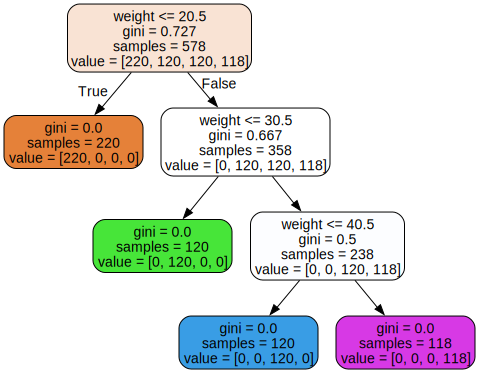

In [67]:
import graphviz

source = graphviz.Source(source=g)
display(source)

In [96]:
skl_get_dataset('iris').frame

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [98]:
python_environment_check

NameError: name 'python_environment_check' is not defined